<h1 align='center' style="color: blue;">Text Analysis (DrameGenre prediction)</h1>

Objective is to a predictive model that can predict whether or not a movie is a <i>Drama</i>. Will be using the textual features of the movie stories and creat predictive models. There are totally three different files in this project.

<ol>
    <li><b>movie_story_student_file.csv</b>: This file contains the movie stories that should be used for model development.</li>
    <li><b>movie_story_evaluation_file.csv</b>: This file is used after developing the predictive models and selecting the best final model. Then using this best predictive model and predict whether or not the movies in <b>movie story evaluation file.csv</b> are Drama.</li>
    <li><b>movies.csv</b>: This file contain the movie genres.</li>
</ol>

<b>Project tasks:</b>


<b>Step 1:</b> Exploring all files to become familiar with the dataset <br />
<b>Step 2:</b> There are 20,000 movies in `movie_story_student_file.csv`file. Using the `movies.csv` file to determine whether a movie is Drama or not. The final output of this step is the development of a dataframe file that contains three columns: 1) movieId, 2) story, 3) DramaGenre. The value for the third column will be in a binary format. If the movie is drama the value is 1, otherwise 0. <br />
<b>Step 3:</b> Using supervised learning and text analysis knowledge to develope different predictive models (i.e. logestic regression, random forest, ...). Testing the performance of these models in terms of accuracy, precision, recall, and F1 scores. <br />
<b>Step 4:</b> Choosing one of them as best model. Then using the full data available in `main dataset` to train that model.<br />
<b>Step 5:</b> Preparing data in `movie_story_evaluation_file.csv` for prediction. will be performing the exact same steps same as <b>Step 2</b> to prepare this new dataset. <br />
<b>Step 6:</b> Using the selected model in Step 5 to predict whether or not movies in `evaluation_dataset` are Drama movies. <br />
<b>Step 7:</b> Reporting the final accuracy, precision, recall and F1 score. <br />

Importing some necessities. This includes `numpy` and `pandas`.

In [1]:
import numpy as np
import pandas as pd

Will be opening and reading a few .csv files. They are stored in the same directory as this .ipynb file.

The contents of the `movies.csv` file will be stored in the `movies` variable.

The contents of the `movies_story_student_file.csv` file will be stored in the `movies_story_student` variable. 

In [2]:
movies = pd.read_csv('movies.csv')
movies_story_student = pd.read_csv('movie_story_student_file.csv')

In [3]:
movies_story_student

,movie_id,story
0,131072,A girl who always tends to fall in love with t...
1,196609,"Bigfoot has come to the town of Ellwood City, ..."
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount..."
3,196611,"In her first special since 2003, Ellen revisit..."
4,196613,Mike and Sulley are back at Monsters Universit...
...,...,...
19995,56801,The iconic creatures from two of the scariest ...
19996,122337,When a bored-with-life English teacher meets a...
19997,187875,Herbert Blount is a crowdfunding contributor f...
19998,187873,REAL BOY is the coming-of-age story of Bennett...


Let's examine the `movies`.

In [4]:
movies

,movieId,title,genres
0,27509,Carolina (2005),Comedy|Romance
1,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller
2,27788,"Jacket, The (2005)",Drama|Mystery|Sci-Fi|Thriller
3,27821,"Interpreter, The (2005)",Drama|Thriller
4,27839,"Ring Two, The (2005)",Drama|Horror|Mystery|Thriller
...,...,...,...
23493,209051,Jeff Garlin: Our Man in Chicago (2019),(no genres listed)
23494,209085,The Mistletoe Secret (2019),Romance
23495,209133,The Riot and the Dance (2018),(no genres listed)
23496,209157,We (2018),Drama


There are <b>23,498</b> movies with 3 columns from the `movies.csv` file.

Now, let's examine `movies_story_student`.

In [5]:
movies_story_student

,movie_id,story
0,131072,A girl who always tends to fall in love with t...
1,196609,"Bigfoot has come to the town of Ellwood City, ..."
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount..."
3,196611,"In her first special since 2003, Ellen revisit..."
4,196613,Mike and Sulley are back at Monsters Universit...
...,...,...
19995,56801,The iconic creatures from two of the scariest ...
19996,122337,When a bored-with-life English teacher meets a...
19997,187875,Herbert Blount is a crowdfunding contributor f...
19998,187873,REAL BOY is the coming-of-age story of Bennett...


There are <b>20,000</b> movies with 2 columns from the `movies_story_student_file.csv` file.

This is an obvious difference in quantity from the <b>23,498</b> rows in the `movies` variable. Since the goal is to analyze 20,000 movies, will have to perform some preprocessing and data cleaning.

This can be accomplished with the `pd.merge()` function. Merging the datasets based on matching ID values for the movies. However, the two datasets each possess slightly different names for their ID column.

For `movies`, its column is `movieId`. For `movies_story_student`, its column is `movie_id`.

In [6]:
# This will merge based on matching ID values for movie between the two datasets. Afterwards, it will drop any nulls
# or rows without any matches after the merge.
movie_id = pd.merge(movies, movies_story_student, how = 'left', left_on = 'movieId', right_on = 'movie_id').dropna()

# Drops extra columns.
movie_id = movie_id.drop('movie_id', axis = 1)
movie_id = movie_id.drop('title', axis = 1)

# Adds a new 'DramaGenre' column. A binary column that indicates if movie has the string value 'Drama' in their row. 
movie_id['DramaGenre'] = np.where(movie_id['genres'].str.contains('Drama'), 1, 0)

print(movie_id)

       movieId                                  genres  \
0        27509                          Comedy|Romance   
1        27618  Action|Adventure|Drama|Sci-Fi|Thriller   
2        27788           Drama|Mystery|Sci-Fi|Thriller   
3        27821                          Drama|Thriller   
4        27839           Drama|Horror|Mystery|Thriller   
...        ...                                     ...   
23493   209051                      (no genres listed)   
23494   209085                                 Romance   
23495   209133                      (no genres listed)   
23496   209157                                   Drama   
23497   209163                            Comedy|Drama   

                                                   story  DramaGenre  
0      A young woman escapes her wildly eccentric fam...           0  
1      When a hunter sent back to the prehistoric era...           1  
2      A military veteran goes on a journey into the ...           1  
3      After Silvia

The new `movie_id` variable contains the 20,000 movies that have matching ID values between the two .csv files will be considered for the analyses.

Its `genres` column contains the raw information for each movie's genre(s). This was used to build the newly inserted `DramaGenre` column. The `DramaGenre` column stores binary variables of <b>0</b> or <b>1</b>. A value of <b>1</b> indicates that the corresponding row for the movie has 'Drama' in its classified genre.considering the ones with 'Drama' in them.

The `story` column contains the story description for each movie. Will be using this later in the analysis.

In [7]:
main_dataset = movie_id

# Drops the 'genres' column.
main_dataset = main_dataset.drop('genres', axis = 1)
main_dataset

,movieId,story,DramaGenre
0,27509,A young woman escapes her wildly eccentric fam...,0
1,27618,When a hunter sent back to the prehistoric era...,1
2,27788,A military veteran goes on a journey into the ...,1
3,27821,"After Silvia Broome, an interpreter at United ...",1
4,27839,Rachel Keller must prevent evil Samara from ta...,1
...,...,...,...
23493,209051,Comedian Jeff Garlin (unintentionally) celebra...,0
23494,209085,Aria Eubank convinces a famous travel writer t...,0
23495,209133,"This nature/science documentary, showcases the...",0
23496,209157,During a scorching summer in a Belgian-Dutch b...,1


In [10]:
d = main_dataset.DramaGenre

print("Number of 0's and 1's in the data: \n",d.value_counts(dropna=False))
print()
print("Percentage of 0's and 1's in the data: \n",d.value_counts(normalize=True)*100)

Number of 0's and 1's in the data: 
 0    11588
1     8412
Name: DramaGenre, dtype: int64

Percentage of 0's and 1's in the data: 
 0    57.94
1    42.06
Name: DramaGenre, dtype: float64


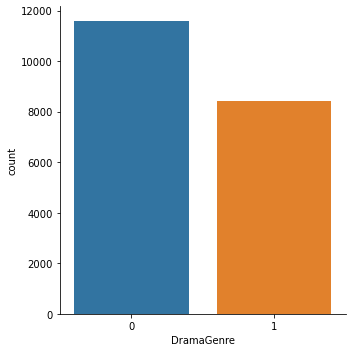

In [11]:
import pandas as pd
import seaborn as sns

sns.catplot(x = 'DramaGenre',data=main_dataset,kind="count")

Observing from above above, only 8,412 of the 20,000 movies are Drama films.

In [12]:
''' Loading in the story columns for positive drama movies from the main_dataset into the dramaMovies variable.
The dramaMovies will be used to fit the vectorizer in the next programming cell below.'''

dramaMovies = main_dataset.story[main_dataset['DramaGenre'] == 1]
print(dramaMovies)

1        When a hunter sent back to the prehistoric era...
2        A military veteran goes on a journey into the ...
3        After Silvia Broome, an interpreter at United ...
4        Rachel Keller must prevent evil Samara from ta...
6        An undercover cop in a not-too-distant future ...
                               ...                        
23484    Eugene is a teenage nerd who lives in a small ...
23485    Sylvain, a young man, devotes his life to smal...
23486    Haunted by her long-suppressed past and pressu...
23496    During a scorching summer in a Belgian-Dutch b...
23497    33-years old Tam\xc3\xa1s Merthner is heartbro...
Name: story, Length: 8412, dtype: object


In [13]:
'''
    Defining the vocabulary in the dictionary of all the movies from the Story column.
'''
from sklearn.feature_extraction.text import CountVectorizer

dramaVect = CountVectorizer()
dramaVect.fit(dramaMovies)

bag_of_words = dramaVect.transform(dramaMovies)
pd.DataFrame(bag_of_words.toarray(), columns = dramaVect.get_feature_names())

/Users/ammu/Desktop/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,07am,10,100,1000,103,1080s,108th,10mn,...,zubaan,zucchini,zuckerberg,zulema,zulu,zurich,zuru,zweet,zweig,zygmunt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Word Cloud

In order to generate the WordCloud, will have to provide String parameters. The variable `dramaMovies` is a Series object that contains numerous String values that describes the story for each movie.

In this cell, will be joining all the different words from all documents under the `story` column. This will be stored inside the text variable. 

In [14]:
'''
    In order to generate the WordCloud, the function will be expecting a String. The dramaMovies is a Series object.
    In this cell, will be joining all the different words from all documents under the Story column. This will be stored
    inside the text variable. 
'''

text = " ".join(story for story in dramaMovies)
print("There are {} words in the combination of all review.".format(len(text)))

There are 2624558 words in the combination of all review.


After considering all of the story descriptions for all of the Drama-related movies, there are over two million words.

From this sheer quantity, can assume that not all of the words are relevant or revealing any meaningful information that would help discern Drama-genre films from their story description. Then can employ the use of `stopwords` to remove commonly used words from consideration.

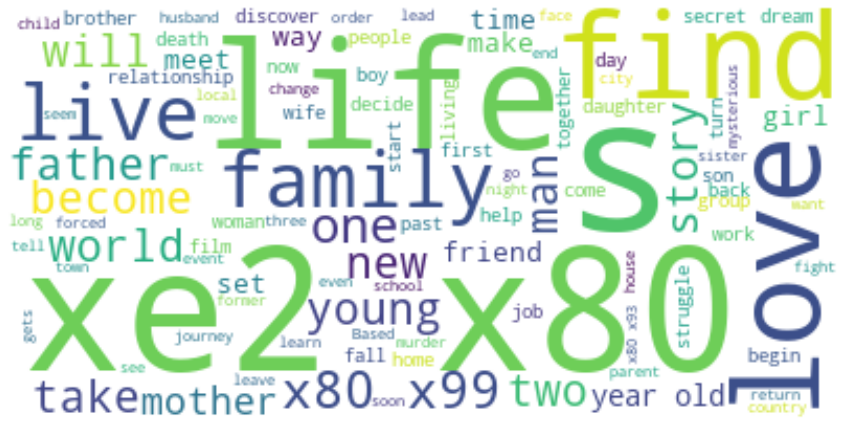

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords, max_font_size=90, max_words=100, background_color="white")
wordcloud.generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");


From the above WordCloud, can observe there are some of the prominent words displayed do not reveal any meaningful information. For instance, <b>x80</b> and <b>xe2</b> do not make sense.

Now can remove these meaningless words by adding them to the stopwords, and generate another Word Cloud with only the meaningful terms.

## **Let's Remove StopWords**

In [16]:
import nltk
nltk.download('stopwords')                          #Importing nltk package for applying Stopwords removal technique
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
#stop.add(' \xe2\x80\x93 ')
#story= main_dataset.story

# Converting all strings into lowercase and splitting it for removing Stopwords
main_dataset.story = main_dataset.story.str.lower()  
main_dataset.story = main_dataset.story.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
main_dataset

[nltk_data] Downloading package stopwords to /Users/ammu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,movieId,story,DramaGenre
0,27509,young woman escapes wildly eccentric family se...,0
1,27618,hunter sent back prehistoric era runs path mus...,1
2,27788,"military veteran goes journey future, foresee ...",1
3,27821,"silvia broome, interpreter united nations head...",1
4,27839,rachel keller must prevent evil samara taking ...,1
...,...,...,...
23493,209051,comedian jeff garlin (unintentionally) celebra...,0
23494,209085,aria eubank convinces famous travel writer fea...,0
23495,209133,"nature/science documentary, showcases vast bea...",0
23496,209157,"scorching summer belgian-dutch border village,...",1


In [17]:
import re


main_dataset.story = main_dataset.story.str.lower()
main_dataset.story = main_dataset.story.apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
main_dataset.story = main_dataset.story.apply(lambda elem: re.sub(r"\d+", "", elem))


tags = (
('\xe2\x80\x99', "'"),
('\xc3\xa9', 'e'),
('\xe2\x80\x90', '-'),
('\xe2\x80\x91', '-'),
('\xe2\x80\x92', '-'),
('\xe2\x80\x93', '-'),
('\xe2\x80\x94', '-'),
('\xe2\x80\x94', '-'),
('\xe2\x80\x98', "'"),
('\xe2\x80\x9b', "'"),
('\xe2\x80\x9c', '"'),
('\xe2\x80\x9c', '"'),
('\xe2\x80\x9d', '"'),
('\xe2\x80\x9e', '"'),
('\xe2\x80\x9f', '"'),
('\xe2\x80\xa6', '...'),
('\xe2\x80\xb2', "'"),
('\xe2\x80\xb3', "'"),
('\xe2\x80\xb4', "'"),
('\xe2\x80\xb5', "'"),
('\xe2\x80\xb6', "'"),
('\xe2\x80\xb7', "'"),
('\xe2\x81\xba', "+"),
('\xe2\x81\xbb', "-"),
('\xe2\x81\xbc', "="),
('\xe2\x81\xbd', "("),
('\xe2\x81\xbe', ")")
)


In [18]:
from bs4 import BeautifulSoup

def clean_latin1(data):
    try:
        return data.encode('utf-8')
    except UnicodeDecodeError:
        data = data.decode('iso-8859-1')
        for _hex, _char in tags:
            data = data.replace(_hex, _char)
        return data.encode('utf8')

def cleanText(text):
    text = BeautifulSoup(text, "html.parser").text
    text = re.sub(r'\|\|\|', r' ', text)
    text = re.sub(r'http\S+', r'<URL>', text)
    text = re.sub('\+','',text)
    text = clean_latin1(text)
    text = text.decode()
    text = text.replace('xe2x80x99',"")
    text = text.lower()
    text = text.replace('\\e2\\80\\99',"")
    text = text.replace('\\',"")
    text = text.replace('x', '')
    return text

In [19]:
main_dataset.story = main_dataset.story.apply(cleanText)
main_dataset

,movieId,story,DramaGenre
0,27509,young woman escapes wildly eccentric family se...,0
1,27618,hunter sent back prehistoric era runs path mus...,1
2,27788,military veteran goes journey future foresee d...,1
3,27821,silvia broome interpreter united nations headq...,1
4,27839,rachel keller must prevent evil samara taking ...,1
...,...,...,...
23493,209051,comedian jeff garlin unintentionally celebrate...,0
23494,209085,aria eubank convinces famous travel writer fea...,0
23495,209133,naturescience documentary showcases vast beaut...,0
23496,209157,scorching summer belgiandutch border village e...,1


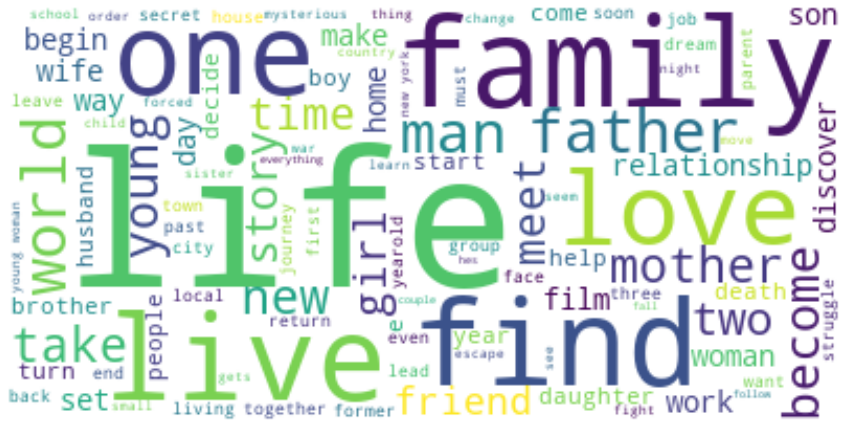

In [20]:
dramaMovies = main_dataset.story[main_dataset['DramaGenre'] == 1]
text = " ".join(story for story in dramaMovies)
wordcloud.generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

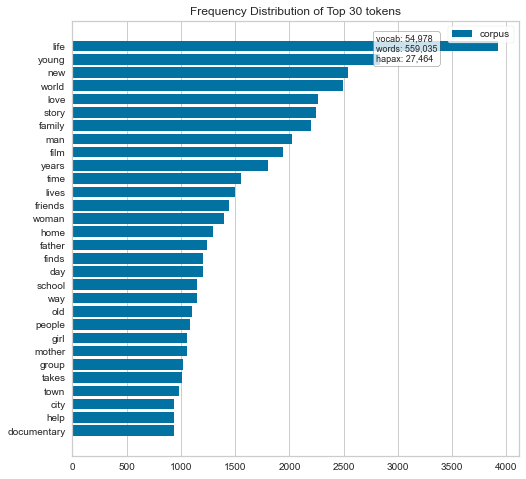

<AxesSubplot:title={'center':'Frequency Distribution of Top 30 tokens'}>

In [21]:
from yellowbrick.text.freqdist import FreqDistVisualizer

from sklearn.feature_extraction.text import CountVectorizer

import matplotlib as mpl

import matplotlib.pyplot as plt

%matplotlib inline



# Find the Document Term Frequency Matrix

vect = CountVectorizer(stop_words='english')

movies_frequency = vect.fit_transform(main_dataset.story)



# Get all features (tokens)

features = vect.get_feature_names_out()



# Use yellowbrick package for visualization of top 30 tokens

fig, ax = plt.subplots(figsize=(8, 8))

visualizer = FreqDistVisualizer(features=features, n=30)

visualizer.fit(movies_frequency)

visualizer.poof()

### **Vectorization Try Block**

Attempting various Vectorization techniques to select the best one for the analysis.

Normal TFIDF

In [22]:
'''
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

story= main_dataset.story

vect = TfidfVectorizer(ngram_range=(1,4), stop_words="english").fit(story) 
X = vect.transform(story)

from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components = 200)
X_tsvd = tsvd.fit_transform(X)
'''

'\nimport nltk\nfrom sklearn.feature_extraction.text import TfidfVectorizer\n\nstory= main_dataset.story\n\nvect = TfidfVectorizer(ngram_range=(1,4), stop_words="english").fit(story) \nX = vect.transform(story)\n\nfrom sklearn.decomposition import TruncatedSVD\ntsvd = TruncatedSVD(n_components = 200)\nX_tsvd = tsvd.fit_transform(X)\n'

Count Vectorizer with TruncatedSVD

In [23]:
'''
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
vect = CountVectorizer(ngram_range=(1,3),stop_words='english')
vect.fit(story)
X = vect.transform(story)    

from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components = 200)
X_tsvd = tsvd.fit_transform(X)
'''

"\nfrom sklearn.feature_extraction.text import CountVectorizer\nimport nltk\nnltk.download('stopwords')\nvect = CountVectorizer(ngram_range=(1,3),stop_words='english')\nvect.fit(story)\nX = vect.transform(story)    \n\nfrom sklearn.decomposition import TruncatedSVD\ntsvd = TruncatedSVD(n_components = 200)\nX_tsvd = tsvd.fit_transform(X)\n"

SPACY with Lemmatization

In [24]:
'''
from html import unescape
import spacy

spacy.load('en_core_web_sm')
lemmatizer = spacy.lang.en.English()

# defining new tokenizer
def my_tokenizer(doc):
    tokens = lemmatizer(doc)
    return([token.lemma_ for token in tokens])

# remove html entities from docs and
# set everything to lowercase
def my_preprocessor(doc):
    return(unescape(doc).lower())
'''

"\nfrom html import unescape\nimport spacy\n\nspacy.load('en_core_web_sm')\nlemmatizer = spacy.lang.en.English()\n\n# defining new tokenizer\ndef my_tokenizer(doc):\n    tokens = lemmatizer(doc)\n    return([token.lemma_ for token in tokens])\n\n# remove html entities from docs and\n# set everything to lowercase\ndef my_preprocessor(doc):\n    return(unescape(doc).lower())\n"

In [25]:
'''
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

story= main_dataset.story
custom_vec = TfidfVectorizer(tokenizer=my_tokenizer, 
                             preprocessor=my_preprocessor, 
                             ngram_range=(1,3))
X = custom_vec.fit_transform(story)

from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components = 1)
X_tsvd = tsvd.fit_transform(X)
'''

'\nimport nltk\nfrom sklearn.feature_extraction.text import TfidfVectorizer\n\nstory= main_dataset.story\ncustom_vec = TfidfVectorizer(tokenizer=my_tokenizer, \n                             preprocessor=my_preprocessor, \n                             ngram_range=(1,3))\nX = custom_vec.fit_transform(story)\n\nfrom sklearn.decomposition import TruncatedSVD\ntsvd = TruncatedSVD(n_components = 1)\nX_tsvd = tsvd.fit_transform(X)\n'

TDIDF Vectorizer with Lemmatization

In [26]:
'''
from html import unescape
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# instantiate nltk's WordNet Lemmatizer 
Lemmatizer = WordNetLemmatizer()

def my_tokenizer(doc):
    tokens = word_tokenize(doc)
    return([Lemmatizer.lemmatize(token, pos="v") for token in tokens])

def my_preprocessor(doc):                        
    return(unescape(doc).lower())
'''

'\nfrom html import unescape\nfrom nltk.tokenize import word_tokenize\nfrom nltk.stem import WordNetLemmatizer\n# instantiate nltk\'s WordNet Lemmatizer \nLemmatizer = WordNetLemmatizer()\n\ndef my_tokenizer(doc):\n    tokens = word_tokenize(doc)\n    return([Lemmatizer.lemmatize(token, pos="v") for token in tokens])\n\ndef my_preprocessor(doc):                        \n    return(unescape(doc).lower())\n'

In [27]:
'''
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

nltk.download('stopwords')
#Calling TfidVectorizer function and applying Stemming  approach to dataset without Stopwords
custom_vec = TfidfVectorizer(tokenizer=my_tokenizer,                   
                             preprocessor=my_preprocessor, 
                             ngram_range=(1,3))

X = custom_vec.fit_transform(main_dataset.story)
'''

"\nfrom sklearn.feature_extraction.text import CountVectorizer\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nimport nltk\n\nnltk.download('stopwords')\n#Calling TfidVectorizer function and applying Stemming  approach to dataset without Stopwords\ncustom_vec = TfidfVectorizer(tokenizer=my_tokenizer,                   \n                             preprocessor=my_preprocessor, \n                             ngram_range=(1,3))\n\nX = custom_vec.fit_transform(main_dataset.story)\n"

**Best Preprocessing Technique:**  
TFIDF Vectorizer with Stemming

Ran all of the above Vectorization techniques, and the TFIDF Vectorizer with Stemming was selected as the best. It gave the best accuracy.

In [28]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

main_dataset['unstemmed'] = main_dataset["story"].str.split()                         # Splitting every word and adding onto unstemmed words dataframe
main_dataset['story_stemmed'] = main_dataset['unstemmed'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
main_dataset.head()

,movieId,story,DramaGenre,unstemmed,story_stemmed
0,27509,young woman escapes wildly eccentric family se...,0,"[young, woman, escapes, wildly, eccentric, fam...","[young, woman, escap, wildli, eccentr, famili,..."
1,27618,hunter sent back prehistoric era runs path mus...,1,"[hunter, sent, back, prehistoric, era, runs, p...","[hunter, sent, back, prehistor, era, run, path..."
2,27788,military veteran goes journey future foresee d...,1,"[military, veteran, goes, journey, future, for...","[militari, veteran, goe, journey, futur, fores..."
3,27821,silvia broome interpreter united nations headq...,1,"[silvia, broome, interpreter, united, nations,...","[silvia, broom, interpret, unit, nation, headq..."
4,27839,rachel keller must prevent evil samara taking ...,1,"[rachel, keller, must, prevent, evil, samara, ...","[rachel, keller, must, prevent, evil, samara, ..."


In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/ammu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
from html import unescape
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()                       # Defining new tokenizer
def my_tokenizer(doc):
    tokens = word_tokenize(doc)
    return([stemmer.stem(token) for token in tokens])

def my_preprocessor(doc):                        # Removing html entities from document and setting everything to lowercase
    return(unescape(doc).lower())

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

nltk.download('stopwords')
#Calling TfidVectorizer function and applying Stemming  approach to dataset without Stopwords
custom_vec = TfidfVectorizer(tokenizer=my_tokenizer,                   
                             preprocessor=my_preprocessor, 
                             ngram_range=(1,3))

X = custom_vec.fit_transform(main_dataset.story)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreyasrajamarthand/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
X.shape

(20000, 1044744)

In [34]:
# Taking y as the target varible
y= main_dataset.DramaGenre
y=y.astype("int64")
y.shape

(20000,)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

With the data preprocessed, have the <b>X</b> and <b>y</b>. Will use these variables to train and test various predictive learning models.

For <b>y</b>, <b>0</b> indicates a non-drama movie, and <b>1</b> indicates a drama movie.


**Logistic Regression**

Logistic Regression is one of the basic and most popular algorithms used to solve a classification problem. In this process, the modelling is done by computing the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on.

𝑦̂=1/1+𝑒−𝑧,    𝑧̂=𝛽0+𝛽0𝑋1+𝛽2𝑋2+...+𝛽𝑚𝑋𝑚 
                         
  𝑝𝑟𝑜𝑏(𝑦(𝑖)=1|𝑋(𝑖))=1/1+𝑒−𝑧(𝑖), 
                  
  𝑧(𝑖)=𝛽0+𝛽0𝑋(𝑖)1+𝛽2𝑋(𝑖)2+...+𝛽𝑚𝑋(𝑖) 




Accuracy for Logistic Regression: 69.33

confusion_matrix: 
 [[2809  714]
 [1126 1351]]

classification_report: 
               precision    recall  f1-score   support

           0       0.71      0.80      0.75      3523
           1       0.65      0.55      0.59      2477

    accuracy                           0.69      6000
   macro avg       0.68      0.67      0.67      6000
weighted avg       0.69      0.69      0.69      6000



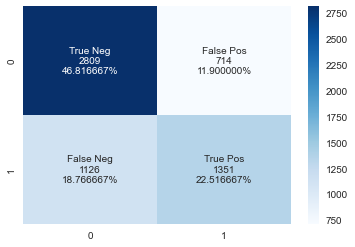

In [81]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
Model_LogisticReg = LogisticRegression(C=1000,max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0)
Model_LogisticReg.fit(X_train, y_train)
y_test_hat_log = Model_LogisticReg.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_test_hat_log)


plt.show()
print()
print("Accuracy for Logistic Regression: {}".format(round(accuracy_score(y_test,y_test_hat_log) * 100,2)))
print()
print("confusion_matrix: \n",cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, (ax1) = plt.subplots(1)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax1)

print()
print("classification_report: \n",classification_report(y_test,y_test_hat_log))

<b>Results of the Logistic Regression model:</b>

<b>Accuracy:</b> 69.33

<b>Precision for 1's:</b> 0.65

<b>Recall for 1's:</b> 0.55

<b>F1 for 1's:</b> 0.59

The above results indicate a accuracy score of 69.33. Given the prediction is for binary data, can consider the <b>F1 scores</b> for 0's & 1's, which are 0.75 and 0.59 respectively. As the train set has more 0's compared to 1's, one could expect the 0's to be predicted more accurately. 



**Cross-validation**

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The most common version of cross validation is K-fold cross validation where k is user-specified number.

In [82]:
#Logistic Reg - Cross Validation

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=300), param_grid, cv=5) 
grid.fit(X, y)
print("Best cross-validation score: {:.2f}".format(grid.best_score_*100)) 
print("Best parameters: ", grid.best_params_)


Best cross-validation score: 69.18
Best parameters:  {'C': 10}


<b>Results of Logistic Regression model with Cross Validation:</b>

<b>Best Cross-Validation score:</b> 69.18

<b>Best Parameter(s):</b> {'C': 10}


**DecisionTreeClassifier**

Decision Trees are a supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation. 
  
  There are two popular methods to select the right question: 

             1. Gini impurity ( main focus) and 2. Entropy

   Gini impurity can be computed as :
            𝐺(𝑘)=∑𝑚𝑖=1𝑝(𝑖)×(1−𝑝(𝑖))




Accuracy for Decision tree : 59.35

confusion_matrix: 
 [[2266 1257]
 [1182 1295]]

classification_report: 
               precision    recall  f1-score   support

           0       0.66      0.64      0.65      3523
           1       0.51      0.52      0.52      2477

    accuracy                           0.59      6000
   macro avg       0.58      0.58      0.58      6000
weighted avg       0.60      0.59      0.59      6000



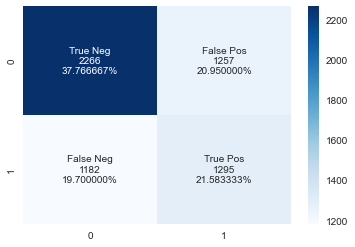

In [83]:
from sklearn.tree import DecisionTreeClassifier

Tree = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
Tree.fit(X_train, y_train)
y_test_hat_Tree = Tree.predict(X_test)

print()
cf_matrix = confusion_matrix(y_test, y_test_hat_Tree)

plt.show()
print()
print("Accuracy for Decision tree : {}".format(round(accuracy_score(y_test,y_test_hat_Tree) * 100,2)))
print()
print("confusion_matrix: \n",cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, (ax1) = plt.subplots(1)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax1)

print()
print("classification_report: \n",classification_report(y_test,y_test_hat_Tree))

<b>Results of Decision Tree model:</b>

<b>Accuracy:</b> 59.35

<b>Precision for 1's:</b> 0.51

<b>Recall for 1's:</b> 0.52

<b>F1 for 1's:</b> 0.52

The above results indicate a accuracy score of 59.35.


Given the prediction is for binary data, can consider the F1 score for 0's & 1's which is 0.65 and 0.52 respectively. As the train set has more 0's compared to 1's, one could expect the 0's to be predicted more accurately.

In [84]:
#Decision tree with StratifiedKFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV,StratifiedKFold


model = DecisionTreeClassifier()

param_grid = {'max_depth': [1,2,3,4,5,6,7]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(model, param_grid, cv = cv, return_train_score=True, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Validation Score: {}".format(grid.best_score_))

bestModel = grid.best_estimator_
y_train_hat  = bestModel.predict(X_train)
y_test_hat  = bestModel.predict(X_test)
print()

Best Parameter: {'max_depth': 7}
Best Cross Validation Score: 0.6075714285714285



<b>Results of Decision tree model with GridSearchCV:</b>

<b>Best Parameter:</b> {'max_depth': 7}

<b>Best Cross Validation Score:</b> 0.6079285714285715


**Random Forest**

A Random Forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter.



Accuracy for Random Forest : 65.93

confusion_matrix: 
 [[2600  923]
 [1121 1356]]

classification_report: 
               precision    recall  f1-score   support

           0       0.70      0.74      0.72      3523
           1       0.59      0.55      0.57      2477

    accuracy                           0.66      6000
   macro avg       0.65      0.64      0.64      6000
weighted avg       0.66      0.66      0.66      6000



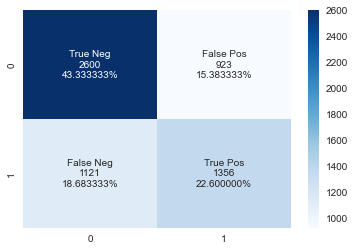

In [85]:
#Random Forest

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier


tree = DecisionTreeClassifier()
# initialize bagging with 100 decision trees (each tree use 80% of training data)
bag = BaggingClassifier(tree, n_estimators=100, 
                        max_samples=0.8, random_state=0)


bag.fit(X_train,y_train)

y_test_hat_RF  = bag.predict(X_test)

print()
cf_matrix = confusion_matrix(y_test, y_test_hat_RF)

plt.show()
print()
print("Accuracy for Random Forest : {}".format(round(accuracy_score(y_test,y_test_hat_RF) * 100,2)))
print()
print("confusion_matrix: \n",cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, (ax1) = plt.subplots(1)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax1)

print()
print("classification_report: \n",classification_report(y_test,y_test_hat_RF))

<b>Results of Random Forest model:</b>

<b>Accuracy:</b> 65.93

<b>Precision:</b> 0.59

<b>Recall:</b> 0.55

<b>F1:</b> 0.57

The above results indicate a accuracy score of 65.93. Given the prediction is for binary data, can consider F1 score for 0's & 1's which are 0.72 and 0.57 respectively. As the train set has more 0's compared to 1's, one could expect the 0's to be predicted more accurately.

**K-Nearest Neighbors**

KNN is one of the simplest and widely used classification algorithms in which a new data point is classified based on similarity in the specific group of neighboring data points.  Given the K-similar examples, the most popular target (majority voting) is chosen as the classification label.This gives a competitive result.



Accuracy for K-Nearest Neighbors : 62.1

confusion_matrix: 
 [[2504 1019]
 [1255 1222]]

classification_report: 
               precision    recall  f1-score   support

           0       0.67      0.71      0.69      3523
           1       0.55      0.49      0.52      2477

    accuracy                           0.62      6000
   macro avg       0.61      0.60      0.60      6000
weighted avg       0.62      0.62      0.62      6000



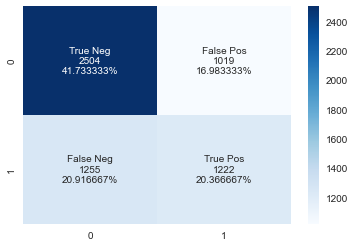

In [27]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
y_test_hat_KNN = model.predict(X_test)

print()
cf_matrix = confusion_matrix(y_test, y_test_hat_KNN)

plt.show()
print()
print("Accuracy for K-Nearest Neighbors : {}".format(round(accuracy_score(y_test,y_test_hat_KNN) * 100,2)))
print()
print("confusion_matrix: \n",cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, (ax1) = plt.subplots(1)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax1)

print()
print("classification_report: \n",classification_report(y_test,y_test_hat_KNN))

<b>Results of K-Nearest Neighbors  model:</b>

<b>Accuracy:</b> 62.1

<b>Precision for 1's:</b> 0.55

<b>Recall for 1's:</b> 0.49

<b>F1 for 1's:</b> 0.52

The above results indicate a accuracy score of 62.1. Given the prediction is for binary data, can consider F1 score for 0's & 1's which are 0.69 and 0.52 respectively. As the train set has more 0's compared to 1's, one could expect the 0's to be predicted more accurately.

In [28]:
#K-Nearest Neighbors with StratifiedKFold

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()

param_grid = {'n_neighbors': [1,2,3,4,5,6]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X_train, y_train)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Validation Score: {}".format(grid.best_score_))

Best Parameter: {'n_neighbors': 6}
Best Cross Validation Score: 0.6254285714285714


<b>Results of KNN model with GridSearchCV:</b>

<b>Best Parameter:</b> {'n_neighbors': 6}

<b>Best Cross Validation Score:</b> 0.6254285714285714


**Neural Network**

A Neural Network consists of units, arranged in layers, which convert an input vector into some output.  Each unit takes an input, applies a function to it and then passes the output on to the next layer.  Generally the networks are defined to be feed-forward: a unit feeds its output to all the units on the next layer, but there is no feedback to the previous layer.



Accuracy for Neural Network : 68.72

confusion_matrix: 
 [[2726  797]
 [1080 1397]]

classification_report: 
               precision    recall  f1-score   support

           0       0.72      0.77      0.74      3523
           1       0.64      0.56      0.60      2477

    accuracy                           0.69      6000
   macro avg       0.68      0.67      0.67      6000
weighted avg       0.68      0.69      0.68      6000



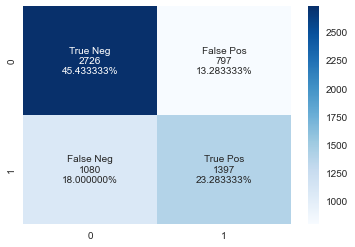

In [29]:
#Neural Network

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(solver='lbfgs',random_state=0, 
                      hidden_layer_sizes=[10], max_iter=50000)
model.fit(X_train,y_train)

y_test_hat_Neural = model.predict(X_test)


print()
cf_matrix = confusion_matrix(y_test, y_test_hat_Neural)

plt.show()
print()
print("Accuracy for Neural Network : {}".format(round(accuracy_score(y_test,y_test_hat_Neural) * 100,2)))
print()
print("confusion_matrix: \n",cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, (ax1) = plt.subplots(1)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax1)

print()
print("classification_report: \n",classification_report(y_test,y_test_hat_Neural))

<b>Results of Neural Network:</b>

<b>Accuracy:</b> 68.72

<b>Precision for 1's:</b> 0.64

<b>Recall for 1's:</b> 0.56

<b>F1 for 1's:</b> 0.60

The above results indicate a accuracy score of 68.72. Given the prediction is for binary data, can consider the F1 score for 0's & 1's which are 0.74 and 0.60 respectively. As the train set has more 0's compared to 1's, one could expect the 0's to be predicted more accurately.



Accuracy for SGDClassifier : 68.23

confusion_matrix: 
 [[3004  519]
 [1387 1090]]

classification_report: 
               precision    recall  f1-score   support

           0       0.68      0.85      0.76      3523
           1       0.68      0.44      0.53      2477

    accuracy                           0.68      6000
   macro avg       0.68      0.65      0.65      6000
weighted avg       0.68      0.68      0.67      6000



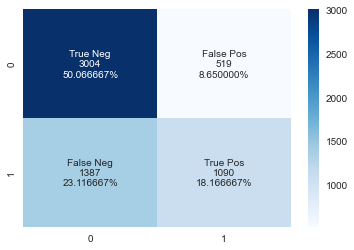

In [30]:
# SGDClassifier model

from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
y_test_hat_SGD = model.predict(X_test)

print()
cf_matrix = confusion_matrix(y_test, y_test_hat_SGD)

plt.show()
print()
print("Accuracy for SGDClassifier : {}".format(round(accuracy_score(y_test,y_test_hat_SGD) * 100,2)))
print()
print("confusion_matrix: \n",cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, (ax1) = plt.subplots(1)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax1)

print()
print("classification_report: \n",classification_report(y_test,y_test_hat_SGD))

<b>Results of SGDClassifier:</b>

<b>Accuracy:</b> 68.23

<b>Precision for 1's:</b> 0.68

<b>Recall for 1's:</b> 0.44

<b>F1 for 1's:</b> 0.53

The above results indicate a accuracy score of 68.23. Given the prediction is for binary data, can consider the F1 score for 0's & 1's, which are 0.76 and 0.53 respectively. As the train set has more 0's compared to 1's, one could expect the 0's to be predicted more accurately.

In this section, will be employing the use of a Word Cloud diagram. In this context, it can be used to visualize the most prominent words in all of the story descriptions for the movies with Drama in their genre.

In [31]:
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
%matplotlib inline


Considering the story descriptions from Drama-genre movies, in this cell below, can obtain exactly how many movies from `main_dataset` have a value of 1 in the <b>DramaGenre</b> column.

In [32]:
# There are 8,412 movies that are actually classified as Dramas.
print(main_dataset[main_dataset['DramaGenre'] == 1].shape)

(8412, 5)


## Training the Best Model on whole dataset

As specified in the tasks, will be training the best model on the entire `main_dataset`.

In [33]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components = 100)
X = tsvd.fit_transform(X)

In [34]:
from sklearn.neural_network import MLPClassifier

best_model_MLP= MLPClassifier(solver='lbfgs',random_state=0, 
                      hidden_layer_sizes=[10], max_iter=50000)
best_model_MLP.fit(X,y)


MLPClassifier(hidden_layer_sizes=[10], max_iter=50000, random_state=0,
              solver='lbfgs')

In [35]:
from sklearn.linear_model import LogisticRegression

best_model_Log = LogisticRegression(C=1000,max_iter=10000)

best_model_Log.fit(X, y)

LogisticRegression(C=1000, max_iter=10000)

## **Preparing the Evaluation Data**

The third file `movie_story_evaluation_file.csv` will be used for prediction. Since this is a new dataset, have to follow the steps to preprocess and prepare this evaluation dataset.

In [36]:
movies = pd.read_csv('movies.csv')
movie_story_eval = pd.read_csv('movie_story_evaluation_file.csv')

In [37]:
movie_story_eval

,movie_id,story
0,122349,Growing up in the Mission district of San Fran...
1,122351,A soldier returns home from the Iraq war only ...
2,122361,Marco the Monkey works as a beach officer. But...
3,187901,"When an honest cop, Vijay Kumar\'s family is r..."
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr..."
...,...,...
3493,131062,"In the middle of nowhere, 20 years after an ap..."
3494,131064,After living for years as a struggling artist ...
3495,131066,Ronal is a young barbarian with low self-estee...
3496,131068,"Ziege, H\xc3\xa4schen and Max have now moved t..."


In [38]:
eval_set = pd.merge(movies, movie_story_eval, how = 'left', left_on = 'movieId', right_on = 'movie_id').dropna()
eval_set = eval_set.drop('movie_id', axis = 1)
eval_set = eval_set.drop('title', axis = 1)

eval_set['DramaGenre'] = np.where(eval_set['genres'].str.contains('Drama'), 1, 0)

eval_set = eval_set.drop('genres', axis = 1)
print(eval_set)

       movieId                                              story  DramaGenre
1122     56835  At popular South Beach University, filthy rich...           0
1123     56837  Witty, playful and utterly magical, the story ...           1
1124     56846  Rainbow press reporter Ludo is sentenced to 8 ...           0
1125     56869  A pawn shop proprietor buys used goods from de...           0
1126     56885  The true story of a brilliant but politically ...           1
...        ...                                                ...         ...
21413   196587  Sophia Grace and Rosie are sent to Switzelvani...           0
21414   196589  Doctors, nutritionists, authors and entreprene...           0
21415   196591  Paul Liebrandt is one of the most talented and...           0
21416   196593  This film is an homage to the Gaza Strip and t...           0
21417   196597  A woman, who gets released from prison and reu...           0

[3498 rows x 3 columns]


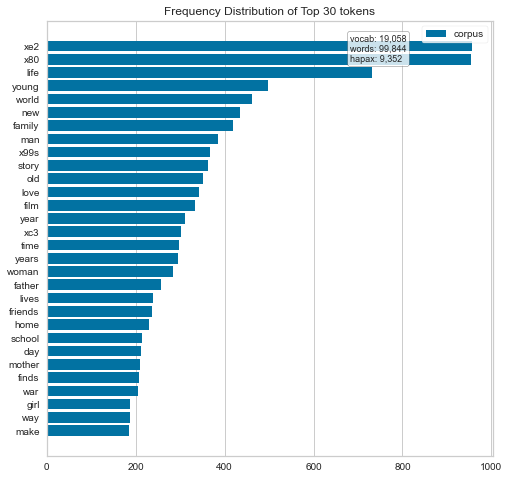

<AxesSubplot:title={'center':'Frequency Distribution of Top 30 tokens'}>

In [39]:
from yellowbrick.text.freqdist import FreqDistVisualizer 
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Find the Document Term Frequency Matrix 
vect = CountVectorizer(stop_words='english')
eval_set_frequency = vect.fit_transform(eval_set.story)

# Get all features (tokens)
features = vect.get_feature_names_out()

# Use yellowbrick package for visualization of top 30 tokens
fig, ax = plt.subplots(figsize=(8, 8))
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(eval_set_frequency)
visualizer.poof()

In [40]:
y_eval= eval_set.DramaGenre
y_eval=y_eval.astype("int64")
y_eval.shape

(3498,)

In [41]:

print("Number of 0's and 1's in the data: \n",y_eval.value_counts(dropna=False))
print()
print("Percentage of 0's and 1's in the data: \n",y_eval.value_counts(normalize=True)*100)

Number of 0's and 1's in our data: 
 0    2075
1    1423
Name: DramaGenre, dtype: int64

Percentage of 0's and 1's in our data: 
 0    59.319611
1    40.680389
Name: DramaGenre, dtype: float64


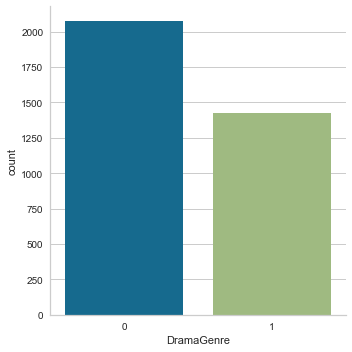

In [42]:
import pandas as pd
import seaborn as sns

sns.catplot(x = 'DramaGenre',data=eval_set,kind="count")

Let's Remove Stopwords:

In [43]:
import nltk
nltk.download('stopwords')                          #Importing nltk package for applying Stopwords removal technique
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
#stop.add(' \xe2\x80\x93 ')


# Converting all strings into lowercase and splitting it for removing Stopwords
eval_set.story = eval_set.story.str.lower()  
eval_set.story = eval_set.story.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
eval_set

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreyasrajamarthand/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,movieId,story,DramaGenre
1122,56835,"popular south beach university, filthy rich su...",0
1123,56837,"witty, playful utterly magical, story compelli...",1
1124,56846,rainbow press reporter ludo sentenced 8 months...,0
1125,56869,pawn shop proprietor buys used goods desperate...,0
1126,56885,true story brilliant politically radical debat...,1
...,...,...,...
21413,196587,sophia grace rosie sent switzelvania special c...,0
21414,196589,"doctors, nutritionists, authors entrepreneurs ...",0
21415,196591,paul liebrandt one talented controversial chef...,0
21416,196593,film homage gaza strip possibility hope beyond...,0


In [44]:
import re


eval_set.story = eval_set.story.str.lower()
eval_set.story = eval_set.story.apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
eval_set.story = eval_set.story.apply(lambda elem: re.sub(r"\d+", "", elem))


tags = (
('\xe2\x80\x99', "'"),
('\xc3\xa9', 'e'),
('\xe2\x80\x90', '-'),
('\xe2\x80\x91', '-'),
('\xe2\x80\x92', '-'),
('\xe2\x80\x93', '-'),
('\xe2\x80\x94', '-'),
('\xe2\x80\x94', '-'),
('\xe2\x80\x98', "'"),
('\xe2\x80\x9b', "'"),
('\xe2\x80\x9c', '"'),
('\xe2\x80\x9c', '"'),
('\xe2\x80\x9d', '"'),
('\xe2\x80\x9e', '"'),
('\xe2\x80\x9f', '"'),
('\xe2\x80\xa6', '...'),
('\xe2\x80\xb2', "'"),
('\xe2\x80\xb3', "'"),
('\xe2\x80\xb4', "'"),
('\xe2\x80\xb5', "'"),
('\xe2\x80\xb6', "'"),
('\xe2\x80\xb7', "'"),
('\xe2\x81\xba', "+"),
('\xe2\x81\xbb', "-"),
('\xe2\x81\xbc', "="),
('\xe2\x81\xbd', "("),
('\xe2\x81\xbe', ")")
)


In [46]:
eval_set.story = eval_set.story.apply(cleanText)
eval_set

,movieId,story,DramaGenre
1122,56835,popular south beach university filthy rich sup...,0
1123,56837,witty playful utterly magical story compelling...,1
1124,56846,rainbow press reporter ludo sentenced months ...,0
1125,56869,pawn shop proprietor buys used goods desperate...,0
1126,56885,true story brilliant politically radical debat...,1
...,...,...,...
21413,196587,sophia grace rosie sent switzelvania special c...,0
21414,196589,doctors nutritionists authors entrepreneurs c...,0
21415,196591,paul liebrandt one talented controversial chef...,0
21416,196593,film homage gaza strip possibility hope beyond...,0


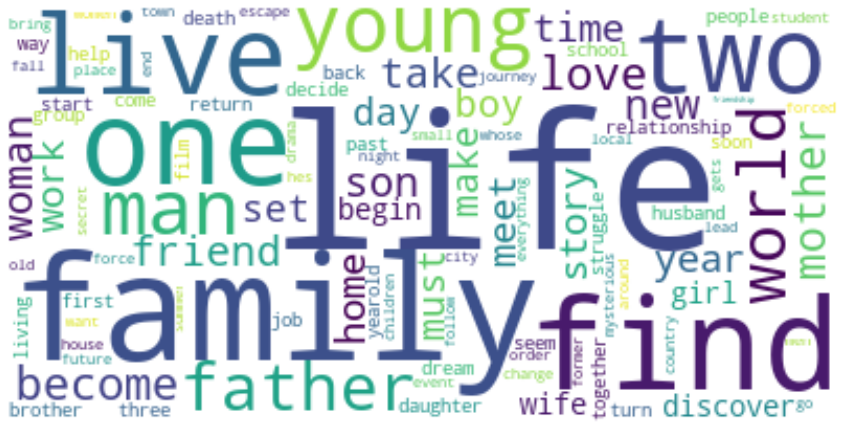

In [ ]:
dramaMovies = eval_set.story[eval_set['DramaGenre'] == 1]
text = " ".join(story for story in dramaMovies)
wordcloud.generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

### Applying TDIDF Vectorizer with Stemmming to Evaluation Data

In [47]:
from html import unescape
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()                       # Defining new tokenizer
def my_tokenizer(doc):
    tokens = word_tokenize(doc)
    return([stemmer.stem(token) for token in tokens])

def my_preprocessor(doc):                        # Removing html entities from document and setting everything to lowercase
    return(unescape(doc).lower())

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Calling TfidVectorizer function and applying Stemming  approach to dataset without Stopwords
custom_vec = TfidfVectorizer(tokenizer=my_tokenizer,                   
                             preprocessor=my_preprocessor, 
                             ngram_range=(1,3))

X_eval = custom_vec.fit_transform(eval_set.story)

from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components = 100)
X_eval = tsvd.fit_transform(X_eval)

In [49]:
X_eval.shape


(3498, 100)

## **Testing the Best Model on Evaluation Dataset**



Accuracy for evaluation set - Neural network : 52.54

confusion_matrix: 
 [[1311  764]
 [ 896  527]]

classification_report: 
               precision    recall  f1-score   support

           0       0.59      0.63      0.61      2075
           1       0.41      0.37      0.39      1423

    accuracy                           0.53      3498
   macro avg       0.50      0.50      0.50      3498
weighted avg       0.52      0.53      0.52      3498



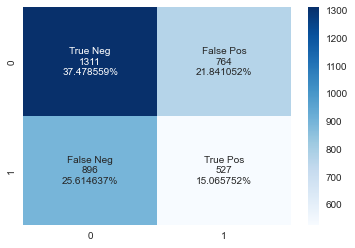

In [50]:
#Neural network


y_test_hat_eval_Neural = best_model_MLP.predict(X_eval)


print()
cf_matrix = confusion_matrix(y_eval, y_test_hat_eval_Neural)

plt.show()
print()
print("Accuracy for evaluation set - Neural network : {}".format(round(accuracy_score(y_eval,y_test_hat_eval_Neural) * 100,2)))
print()
print("confusion_matrix: \n",cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, (ax1) = plt.subplots(1)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax1)

print()
print("classification_report: \n",classification_report(y_eval,y_test_hat_eval_Neural))


## <b>Results for evaluation data set after running the Neural Network model:</b> 

<b>Accuracy:</b> 52.54

<b>Precision for 1's:</b> 0.41 

<b>Recall for 1's:</b> 0.37 

<b>F1 for 1's:</b> 0.39

The above results indicate a accuracy score of 52.54. Given the prediction is for binary data, consider the F1 score for 0's & 1's, which are 0.61 and 0.39 respectively. As the train set has more 0's compared to 1's, one could expect the 0's to be predicted more accurately.


Accuracy for Logistic Regression: 50.63

confusion_matrix: 
 [[1198  877]
 [ 850  573]]

classification_report: 
               precision    recall  f1-score   support

           0       0.58      0.58      0.58      2075
           1       0.40      0.40      0.40      1423

    accuracy                           0.51      3498
   macro avg       0.49      0.49      0.49      3498
weighted avg       0.51      0.51      0.51      3498



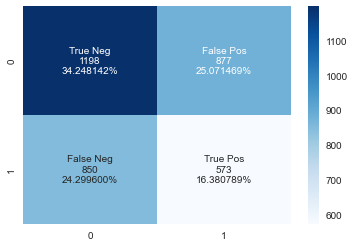

In [52]:
#Logistic Regression

y_test_hat_eval_log = best_model_Log.predict(X_eval)

cf_matrix = confusion_matrix(y_eval, y_test_hat_eval_log)


plt.show()
print()
print("Accuracy for Logistic Regression: {}".format(round(accuracy_score(y_eval,y_test_hat_eval_log) * 100,2)))
print()
print("confusion_matrix: \n",cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, (ax1) = plt.subplots(1)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax1)

print()
print("classification_report: \n",classification_report(y_eval,y_test_hat_eval_log))

<b>Results for evaluation data set after running Logistic Regression model:</b> 

<b>Accuracy:</b> 50.63

<b>Precision for 1's:</b> 0.40 

<b>Recall for 1's:</b> 0.40

<b>F1 for 1's:</b> 0.40 

The above results indicate a accuracy score of 50.63. Given the prediction is for binary data, consider F1 score for 0's & 1's, which are 0.58 and 0.40 respectively. As the train set has more 0's compared to 1's, one could expect the 0's to be predicted more accurately.

In [53]:
#Logistic Reg - Cross Validation with 5 folds

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=300), param_grid, cv=5) 
grid.fit(X_eval, y_eval)
print("Best cross-validation score: {:.2f}".format(grid.best_score_*100)) 
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 66.52
Best parameters:  {'C': 10}


In [54]:
#Logistic Reg - Cross Validation with 10 folds

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=300), param_grid, cv=10) 
grid.fit(X_eval, y_eval)
print("Best cross-validation score: {:.2f}".format(grid.best_score_*100)) 
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 66.64
Best parameters:  {'C': 10}


In conclusion, these models can predict drama-genre movies from their story descriptions fairly well. I believe that if more data were available, the performance of these models would improve.